# CoronaVirus Prediction

In [1]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)
url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
death = pd.read_csv(url_2, error_bad_lines=False)
url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "Unites States")
death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "Unites States")
recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "Unites States")

## Get Population

In [2]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [3]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[55:65,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,Population,region
55,NaN,Azerbaijan,40.1431,47.5769,0,0,0,0,0,0,...,15,28,28,44,44,53,65,65.0,NaN,Azerbaijan_nan
56,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,52,78,84,115,136,160,194,194.0,NaN,Armenia_nan
57,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,11,21,21,34,72,112,202,202.0,NaN,Dominican Republic_nan
58,NaN,Indonesia,-0.7893,113.9213,0,0,0,0,0,0,...,134,172,227,311,369,450,514,514.0,NaN,Indonesia_nan
59,NaN,Portugal,39.3999,-8.2245,0,0,0,0,0,0,...,331,448,448,785,1020,1280,1600,1600.0,NaN,Portugal_nan
60,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,2,39,39,53,75,88,113,113.0,NaN,Andorra_nan
61,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,7,7,10,10,10,16,22,22.0,NaN,Australia_Tasmania
62,NaN,Latvia,56.8796,24.6032,0,0,0,0,0,0,...,34,49,71,86,111,124,139,139.0,NaN,Latvia_nan
63,NaN,Morocco,31.7917,-7.0926,0,0,0,0,0,0,...,29,38,49,63,77,96,115,115.0,NaN,Morocco_nan
64,NaN,Saudi Arabia,24.0000,45.0000,0,0,0,0,0,0,...,118,171,171,274,344,392,511,511.0,NaN,Saudi Arabia_nan


In [4]:
# merge region death
death.iloc[55:65,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,Population,region
55,NaN,Azerbaijan,40.1431,47.5769,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1.0,NaN,Azerbaijan_nan
56,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,NaN,Armenia_nan
57,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,0,1,1,2,2,2,3,3.0,NaN,Dominican Republic_nan
58,NaN,Indonesia,-0.7893,113.9213,0,0,0,0,0,0,...,5,5,19,25,32,38,48,48.0,NaN,Indonesia_nan
59,NaN,Portugal,39.3999,-8.2245,0,0,0,0,0,0,...,0,1,2,3,6,12,14,14.0,NaN,Portugal_nan
60,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1.0,NaN,Andorra_nan
61,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,NaN,Australia_Tasmania
62,NaN,Latvia,56.8796,24.6032,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,NaN,Latvia_nan
63,NaN,Morocco,31.7917,-7.0926,0,0,0,0,0,0,...,1,2,2,2,3,3,4,4.0,NaN,Morocco_nan
64,NaN,Saudi Arabia,24.0000,45.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,NaN,Saudi Arabia_nan


In [5]:
# merge region recover
recover.iloc[55:65,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,Population,region
55,NaN,Azerbaijan,40.1431,47.5769,0,0,0,0,0,0,...,6,6,6,6,6,11,10,10.0,NaN,Azerbaijan_nan
56,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,0,1,1,1,1,1,2,2.0,NaN,Armenia_nan
57,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,NaN,Dominican Republic_nan
58,NaN,Indonesia,-0.7893,113.9213,0,0,0,0,0,0,...,8,8,11,11,15,15,29,29.0,NaN,Indonesia_nan
59,NaN,Portugal,39.3999,-8.2245,0,0,0,0,0,0,...,3,3,3,3,5,5,5,5.0,NaN,Portugal_nan
60,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1.0,NaN,Andorra_nan
61,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,0,0,0,3,3,3,3,3.0,NaN,Australia_Tasmania
62,NaN,Latvia,56.8796,24.6032,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1.0,NaN,Latvia_nan
63,NaN,Morocco,31.7917,-7.0926,0,0,0,0,0,0,...,1,1,1,1,1,3,3,3.0,NaN,Morocco_nan
64,NaN,Saudi Arabia,24.0000,45.0000,0,0,0,0,0,0,...,2,6,6,6,8,16,16,16.0,NaN,Saudi Arabia_nan


## Create Time Series + Plots

In [6]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [7]:
ts=create_ts(confirmed)
ts_d=create_ts(death)
ts_rec=create_ts(recover)

Text(0.5, 1.0, 'Daily Total Recoverd - Major areas')

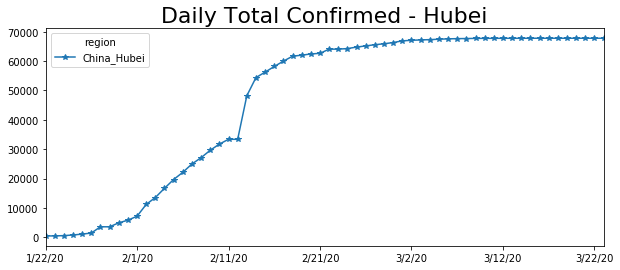

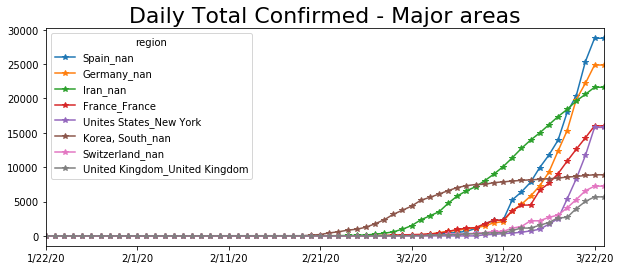

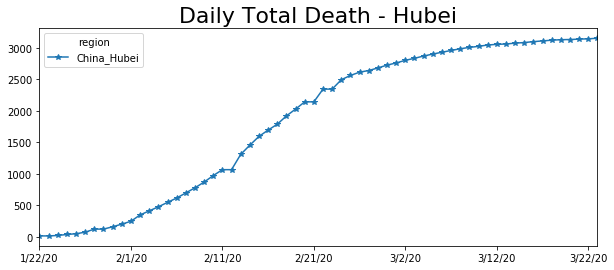

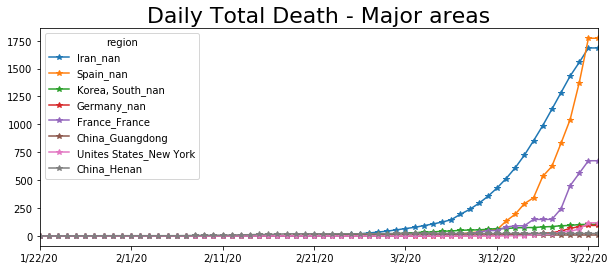

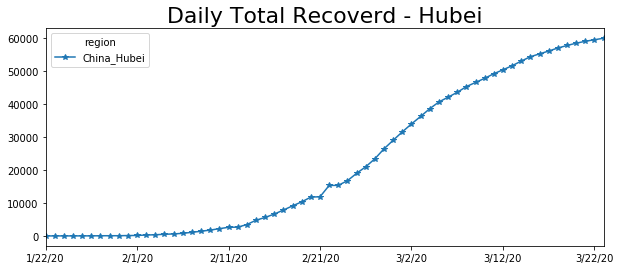

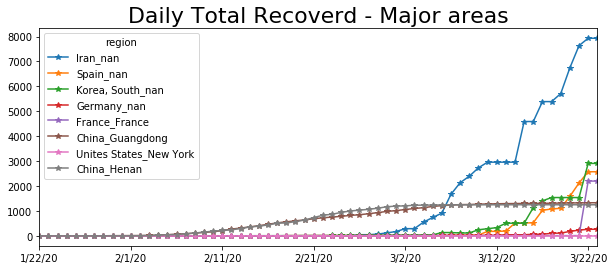

In [9]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Hubei',fontdict={'fontsize': 22})
p.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Major areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Hubei',fontdict={'fontsize': 22})
p_d.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Major areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Hubei',fontdict={'fontsize': 22})
p_r.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Major areas',fontdict={'fontsize': 22})

## Kalman Filter With R

In [10]:
# Create data for R script
ts_r=ts.reset_index()
ts_r=ts_r.rename(columns = {'index':'date'})
ts_r['date']=pd.to_datetime(ts_r['date'] ,errors ='coerce')
ts_r.to_csv(r'/home/notebookuser/notebooks/covid19/korean/ts_r.csv')

In [11]:
!pip install rpy2

In [12]:
import rpy2
%load_ext rpy2.ipython

In [14]:
%%R
install.packages('pracma')
install.packages('Metrics')
install.packages('readr')
install.packages('reshape')


R[write to console]: trying URL 'http://cran.r-project.org/src/contrib/pracma_2.2.9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 400551 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

In [13]:
%%R
Sys.setenv(TZ='GMT')
Sys.timezone()


[1] "GMT"


In [14]:
%%R
require(pracma)
require(Metrics)
require(readr)
Sys.setenv(TZ='GMT')
all<- read_csv("/home/notebookuser/notebooks/covid19/korean/ts_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [15]:
p=%R pred_all

In [16]:
############ Merge R output due to package problem
t=ts_d
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

## Pre Proccessing Data for ML Model

### Extract Weather Data

In [0]:
# !pip install pyweatherbit

In [0]:

# from weatherbit.api import Api
# import json  
# import pandas as pd  
# from pandas.io.json import json_normalize 
# api_key = "26141d374d8e49d0a2e1f1254428ce8e"
# #api_key ="f206579c74644c4b96a2423cb56a1687"
# #api_key ="81a581ac823849f38427fb5081cb8df8"
# #api_key ="be7aaf4ff7184347aa1ebc2a2db514fe"

# api = Api(api_key)
# api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.
# #api.get_forecast(lat=lat, lon=lon)

###Weather History

In [0]:
# ################## already done since API is limited to 500 call per day

# w=pd.DataFrame(columns=['date','region','min','max'])
# for i in range (61,len(confirmed)):
#   start_date=pd.to_datetime('2020-01-22')
#   for j in range (4,confirmed.shape[1]-2):
#     jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=1)).strftime('%Y-%m-%d')).json
#     # j=json_normalize(j)
#     # j=j['data']
#     # max_temp=json_normalize(j['data'])['max_temp'].values[0] # max
#     # min_temp=json_normalize(j['data'])['min_temp'].values[0]
#     try:
#       w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
#     except Exception:
#       w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max':None}, ignore_index=True)
#     start_date=start_date+ pd.DateOffset(days=1)

In [0]:
# ################## Update Recent Day Weather

# w_update=pd.DataFrame(columns=['date','region','min','max'])
# for i in range (28,len(confirmed)):
#   start_date=pd.to_datetime('2020-02-17')
#   for j in range (confirmed.shape[1]-4,confirmed.shape[1]-2):
#     jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=1)).strftime('%Y-%m-%d')).json
#     try:
#       w_update=w_update.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
#     except Exception:
#       w_update=w_update.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max':None}, ignore_index=True)
#     start_date=start_date+ pd.DateOffset(days=1)

In [0]:
# w_update.to_csv(r'w_update.csv')

### Extract Weather Forecast Data

In [0]:
# ################## Forecast Weather With API - Already Done
# #forecast = api.get_forecast(lat=lat, lon=lon)

# w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
# for i in range (0,len(confirmed)):
#     jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
#     jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
#     try:
#       w_forecast_temp=jas
#       w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
#     except Exception:
#       w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
#     w_forecast=w_forecast.append(w_forecast_temp)
# w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
# w_forecast.columns = ['date', 'region', 'min', 'max']
# w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')

In [17]:
w=pd.read_csv('/home/notebookuser/notebooks/covid19/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')
#w['date']=pd.to_datetime(w['date'],errors ='coerce')

w_forecast=pd.read_csv('/home/notebookuser/notebooks/covid19/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Build Train Set Data Structure

In [18]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [19]:
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is t.iloc[i-2,1]):
    t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
    t.iloc[i,6]=(t.iloc[i-1,2]/t.iloc[i-2,2]-1)*100
    t.iloc[i,9]=t.iloc[i-1,2]
  if(t.iloc[i,1] is t.iloc[i-4,1]):
    t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
    t.iloc[i,7]=(t.iloc[i-1,2]/t.iloc[i-4,2]-1)*100
  if(t.iloc[i,1] is t.iloc[i-8,1]):
    t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
    t.iloc[i,8]=(t.iloc[i-1,2]/t.iloc[i-8,2]-1)*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)
t['kalman_prediction']=round(t['kalman_prediction'])
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(1)
train['population']=train['population'].astype('int32')
train['infected_rate'] = (( train['last_day'] ) / ((train['population'] ) *10000))
train=train.merge(w,how='left',on=['date','region'])
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
  if(np.isnan(train.iloc[i,13])):
    if(train.iloc[i,1] is train.iloc[i-1,1]):
      train.iloc[i,13]=train.iloc[i-1,13]
      train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


## Kalman 1 day Prediction with Evaluation

In [20]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='China_Hubei'

#evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
#place=0
#for i in range(1,len(t)):
#  if(t.iloc[i,1] is not t.iloc[i-1,1]):
#    ex=np.array(t.iloc[i-len(ts):i,10])
#    pred=np.array(t.iloc[i-len(ts):i,2])
#    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
#p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
#p.iloc[len(p)-1,2]=None
#p=p.set_index(['date'])
#p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
#print(evaluation[evaluation['region']==p.iloc[0,0]])

In [21]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='China_Shanghai'

#evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
#place=0
#for i in range(1,len(t)):
#  if(t.iloc[i,1] is not t.iloc[i-1,1]):
#    ex=np.array(t.iloc[i-len(ts):i,10])
#    pred=np.array(t.iloc[i-len(ts):i,2])
#    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
#p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
#p.iloc[len(p)-1,2]=None
#p=p.set_index(['date'])
#p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
#print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [22]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='6G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpihes1eac
  JVM stdout: /tmp/tmpihes1eac/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpihes1eac/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/GMT
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,"1 year, 4 months and 26 days !!!"
H2O cluster name:,H2O_from_python_unknownUser_jhvjl4
H2O cluster total nodes:,1
H2O cluster free memory:,6 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [23]:
train=train.fillna(0) 

###train_df=train[train['date']<'2020-02-17']
###boots=train_df[train_df['date']>='2020-02-14'] # some bootstrap to give more weight for recent days
###train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
###train_df_hubei=train_df[train_df['region']=='China_Hubei']
###test=train[train['date']>='2020-02-17']
###test=test[test['date']<'2020-02-19']
###
### Joao - Training in Italy progression - When growth happened 27/02 to 11/03

train_df=train[train['date']<'2020-03-27']
boots=train_df[train_df['date']>='2020-03-11'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-02-27']]*1000,ignore_index=True)

train_df_italy=train_df[train_df['region']=='Italy_nan']
test=train[train['date']>='2020-02-27']
test=test[test['date']<'2020-03-11']

In [24]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
        #    '1_day_change_rate', 
        #    '3_day_change_rate',
        #    '7_day_change_rate', 
            'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
          ]

In [25]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values
pred2.iloc[:55]

,0,confirmed,date,region
0,41.0,1.0,2020-02-27,Afghanistan_nan
1,41.0,1.0,2020-02-28,Afghanistan_nan
2,41.0,1.0,2020-02-29,Afghanistan_nan
3,41.0,1.0,2020-03-01,Afghanistan_nan
4,41.0,1.0,2020-03-02,Afghanistan_nan
5,42.0,1.0,2020-03-03,Afghanistan_nan
6,42.0,1.0,2020-03-04,Afghanistan_nan
7,42.0,1.0,2020-03-05,Afghanistan_nan
8,42.0,1.0,2020-03-06,Afghanistan_nan
9,42.0,1.0,2020-03-07,Afghanistan_nan


In [26]:
pred2.iloc[1900:1950]

,0,confirmed,date,region
1900,24.0,7.0,2020-02-29,Israel_nan
1901,36.0,10.0,2020-03-01,Israel_nan
1902,36.0,10.0,2020-03-02,Israel_nan
1903,19.0,12.0,2020-03-03,Israel_nan
1904,30.0,15.0,2020-03-04,Israel_nan
1905,36.0,20.0,2020-03-05,Israel_nan
1906,48.0,37.0,2020-03-06,Israel_nan
1907,117.0,43.0,2020-03-07,Israel_nan
1908,59.0,61.0,2020-03-08,Israel_nan
1909,130.0,61.0,2020-03-09,Israel_nan


In [27]:

train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_italy_v2 = h2o.H2OFrame(train_df_italy) # different model for Hubei

training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Italian Model

model_italy_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_italy_v2.train(x=training_columns, y=response_column, training_frame=train_h20_italy_v2)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)

/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [28]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao - Italian Model
model_italy_v2.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF

,variable,relative_importance,scaled_importance,percentage
0,1_day_change,6.062563e+14,1.000000,0.327681
1,3_day_change,4.271651e+14,0.704595,0.230883
2,7_day_change,2.318384e+14,0.382410,0.125309
3,last_day,1.687485e+14,0.278345,0.091209
4,infected_rate,1.563791e+14,0.257942,0.084523
5,1_day_change_rate,1.196561e+14,0.197369,0.064674
6,7_day_change_rate,7.017540e+13,0.115752,0.037930
7,3_day_change_rate,6.977536e+13,0.115092,0.037714
8,min,9.259762e+10,0.000153,0.000050
9,max,5.247108e+10,0.000087,0.000028


In [29]:
# # Model performance
# performance = model_hubei.model_performance(test_data=test_h20_hubei)
# # Model Create Predictions
# pred=model_hubei.predict(test_h20_hubei);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
# pred['confirmed']=test_hubei['confirmed'].values
# pred['date']=test_hubei['date'].values
# pred['region']=test_hubei['region'].values

# pred2=model.predict(test_h20);pred2=pred2.as_data_frame(); pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# pred=pred.append(pred2)

## Joao - Model Predictions - Italy_v2
performance = model_italy_v2.model_performance(test_data=test_h20)
# # Model Create Predictions
pred=model_italy_v2.predict(test_h20);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test['confirmed'].values
pred['date']=test['date'].values
pred['region']=test['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


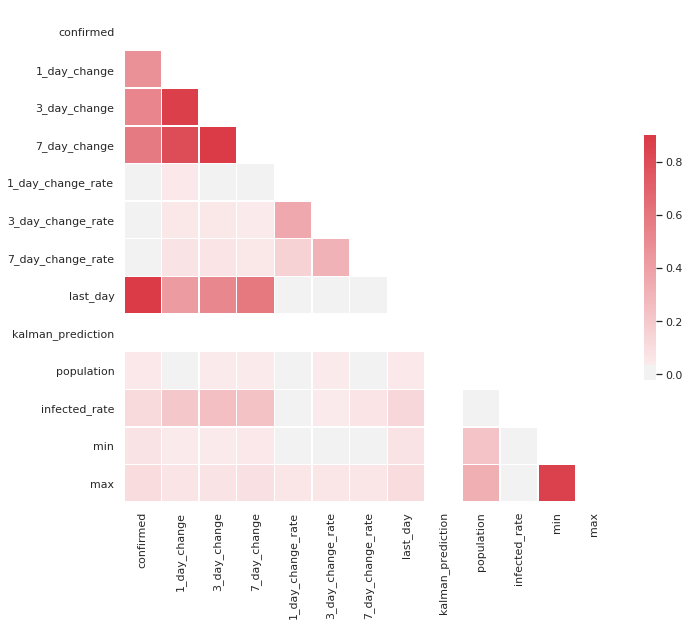

In [30]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [31]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.473206
3_day_change         0.527336
7_day_change         0.587876
1_day_change_rate    0.007671
3_day_change_rate    0.012651
7_day_change_rate    0.019894
last_day             0.972217
kalman_prediction         NaN
population           0.046530
infected_rate        0.114553
min                  0.078168
max                  0.105539
Name: confirmed, dtype: float64


Text(0.5, 1.0, 'Daily Min/Max Temperature - Italy')

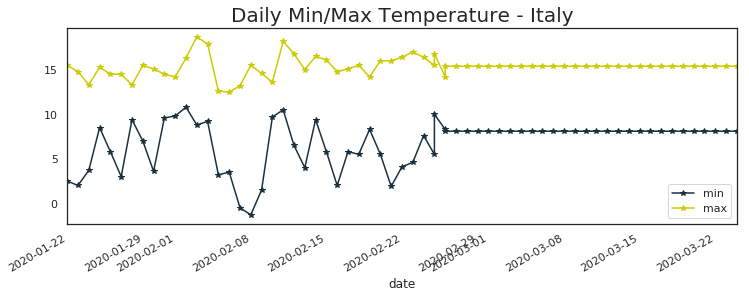

In [32]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
##p=p[p['region']=='China_Hubei']
##p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Italy',fontdict={'fontsize': 20})

## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
p=p[p['region']=='Italy_nan']
p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Italy',fontdict={'fontsize': 20})
#
#

In [33]:
avg_temp=train[['region','confirmed','min','max']]  # from 17-02-20
avg_temp=avg_temp.groupby(by='region').mean()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                                     min        max
region                                             
China_Hubei                     6.512698  13.749206
Italy_nan                       6.798462  15.340000
Iran_nan                        4.740000  13.646154
Korea, South_nan                0.000000   0.000000
Spain_nan                       5.849231  14.724615
Germany_nan                     1.689189   5.445946
France_France                   0.000000   0.000000
China_Guangdong                14.669841  24.846032
Unites States_New York          0.000000   0.000000
China_Henan                     2.607937  10.088889
China_Zhejiang                  8.490476  15.206349
China_Hunan                     9.012698  15.188889
China_Anhui                     5.377778  12.074603
China_Jiangxi                  10.163492  16.777778
Switzerland_nan                -1.491429   1.555714
United Kingdom_United Kingdom   0.000000   0.000000
China_Shandong              

##Kalman X Days Ahead Prediction

In [36]:
%%R
install.packages('reshape')







	‘/tmp/RtmpqIHUqz/downloaded_packages’





In [34]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/korean/ts_r.csv")
all$X1<-NULL
### JOAO
#### for (i in 1:30) { # Set i days prediction
for (i in 1:45) { # Set i days prediction
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [35]:
all_new=%R all_new

In [36]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Italy_nan')

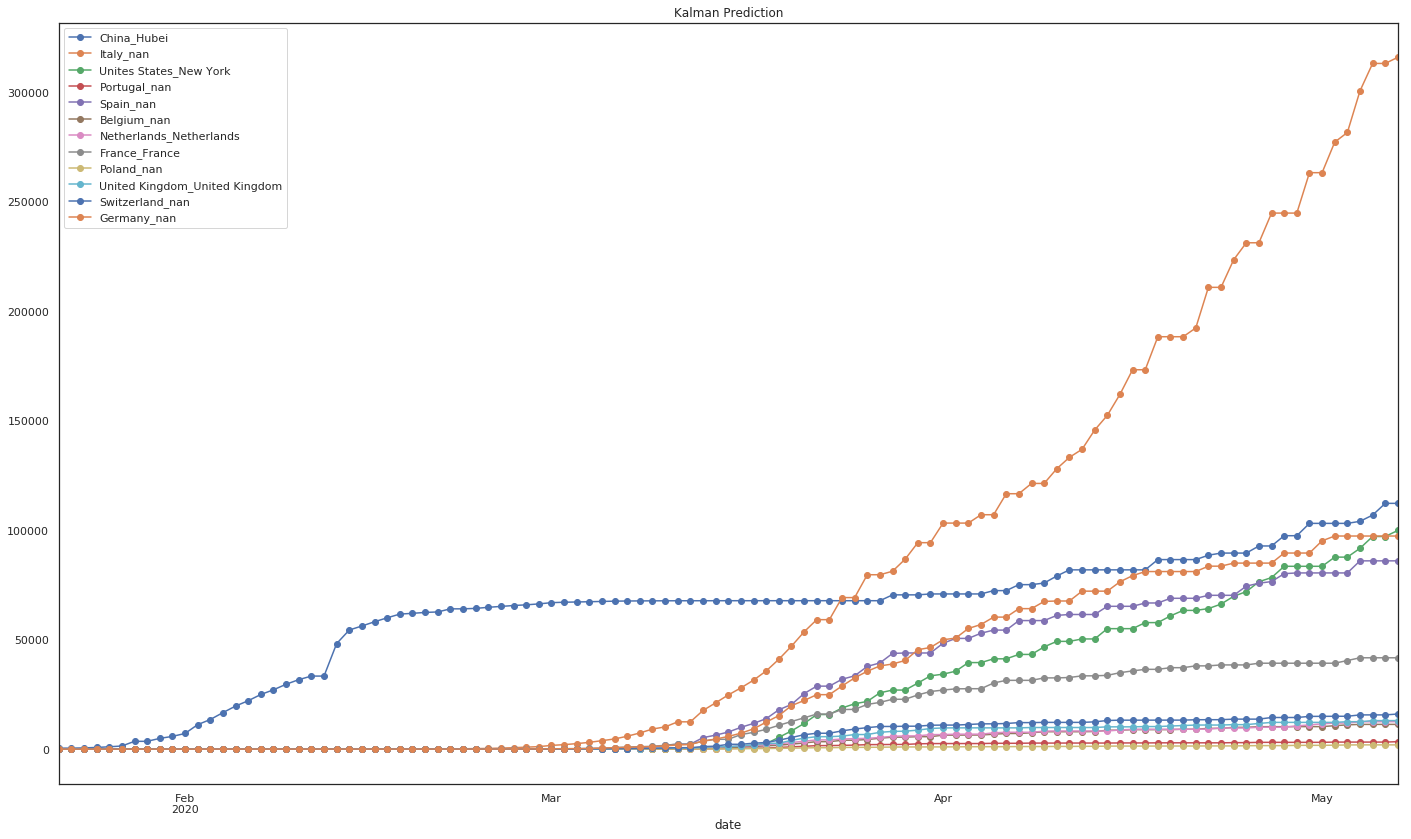

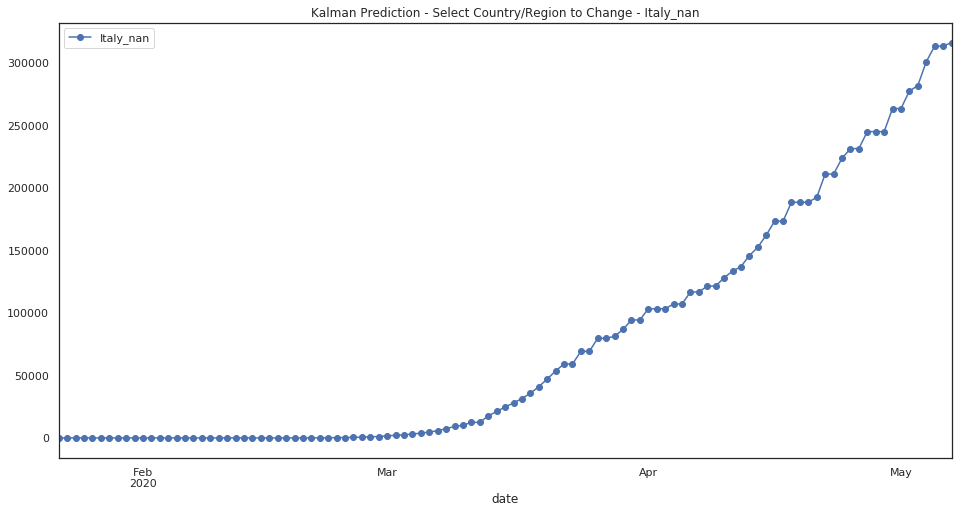

In [40]:
# ['Australia_New South Wales', 'Australia_Queensland',
#        'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
#        'Cambodia_nan', 'Canada_British Columbia', 'Canada_London, ON',
#        'Canada_Toronto, ON', 'China_Anhui', 'China_Beijing',
#        'China_Chongqing', 'China_Fujian', 'China_Gansu',
#        'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
#        'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
#        'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
#        'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
#        'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
#        'China_Shandong', 'China_Shanghai', 'China_Shanxi',
#        'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
#        'China_Yunnan', 'China_Zhejiang', 'Egypt_nan', 'Finland_nan',
#        'France_nan', 'Germany_nan', 'Hong Kong_Hong Kong', 'India_nan',
#        'Italy_nan', 'Japan_nan', 'Macau_Macau', 'Malaysia_nan',
#        'Nepal_nan', 'Others_Diamond Princess cruise ship',
#        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
#        'South Korea_nan', 'Spain_nan', 'Sri Lanka_nan', 'Sweden_nan',
#        'Taiwan_Taiwan', 'Thailand_nan', 'UK_nan',
#        'United Arab Emirates_nan', 'Unites States_Boston, MA',
#        'Unites States_Chicago, IL', 'Unites States_Los Angeles, CA',
#        'Unites States_Madison, WI', 'Unites States_Orange, CA',
#        'Unites States_San Antonio, TX', 'Unites States_San Benito, CA',
#        'Unites States_San Diego County, CA',
#        'Unites States_Santa Clara, CA', 'Unites States_Seattle, WA',
#        'Unites States_Tempe, AZ', 'Vietnam_nan']
# Select region
region=['date',
 #       'China_Hubei',
 #      'China_Anhui', 'China_Beijing',
 #      'China_Chongqing', 'China_Fujian', 'China_Gansu',
 #      'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
 #      'China_Hainan', 'China_Hebei', 'China_Heilongjiang','China_Henan','China_Hunan', 
 #      'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
 #      'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
 #      'China_Shandong', 'China_Shanghai', 'China_Shanxi',
 #      'China_Sichuan',  'China_Xinjiang',
 #      'China_Yunnan', 'China_Zhejiang', 
 #     'Hong Kong_Hong Kong','Others_Diamond Princess cruise ship'
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
        'Unites States_New York',
        'Portugal_nan', 'Spain_nan', 'Belgium_nan', 
        'Netherlands_Netherlands', 'France_France', 'Poland_nan',
        'United Kingdom_United Kingdom', 'Switzerland_nan', 'Germany_nan',
  ### JOAO - LIST of Countries - Finish here       
  #      'Japan_nan'
       ]
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')

#p_kalman2=all_new[['date','China_Hubei']]
p_kalman2=all_new[['date','Italy_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))


In [0]:
# t.to_csv(r't.csv')

## Iterative Regression

In [38]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
  if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
    t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
  if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
    t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
    t_iter.iloc[i,6]=(t_iter.iloc[i-1,2]/t_iter.iloc[i-2,2]-1)*100
    t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
  if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
    t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
    t_iter.iloc[i,7]=(t_iter.iloc[i-1,2]/t_iter.iloc[i-4,2]-1)*100
  if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
    t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
    t_iter.iloc[i,8]=(t_iter.iloc[i-1,2]/t_iter.iloc[i-8,2]-1)*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(1)
test_iter['population']=test_iter['population'].astype('int32')
test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
  if(np.isnan(test_iter.iloc[i,13])):
    if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
      test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
      test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


In [39]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


,date,region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction,population,infected_rate,min,max


In [41]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
      if(pred.iloc[i,0]<pred.iloc[i-1,1]):
        pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        

pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

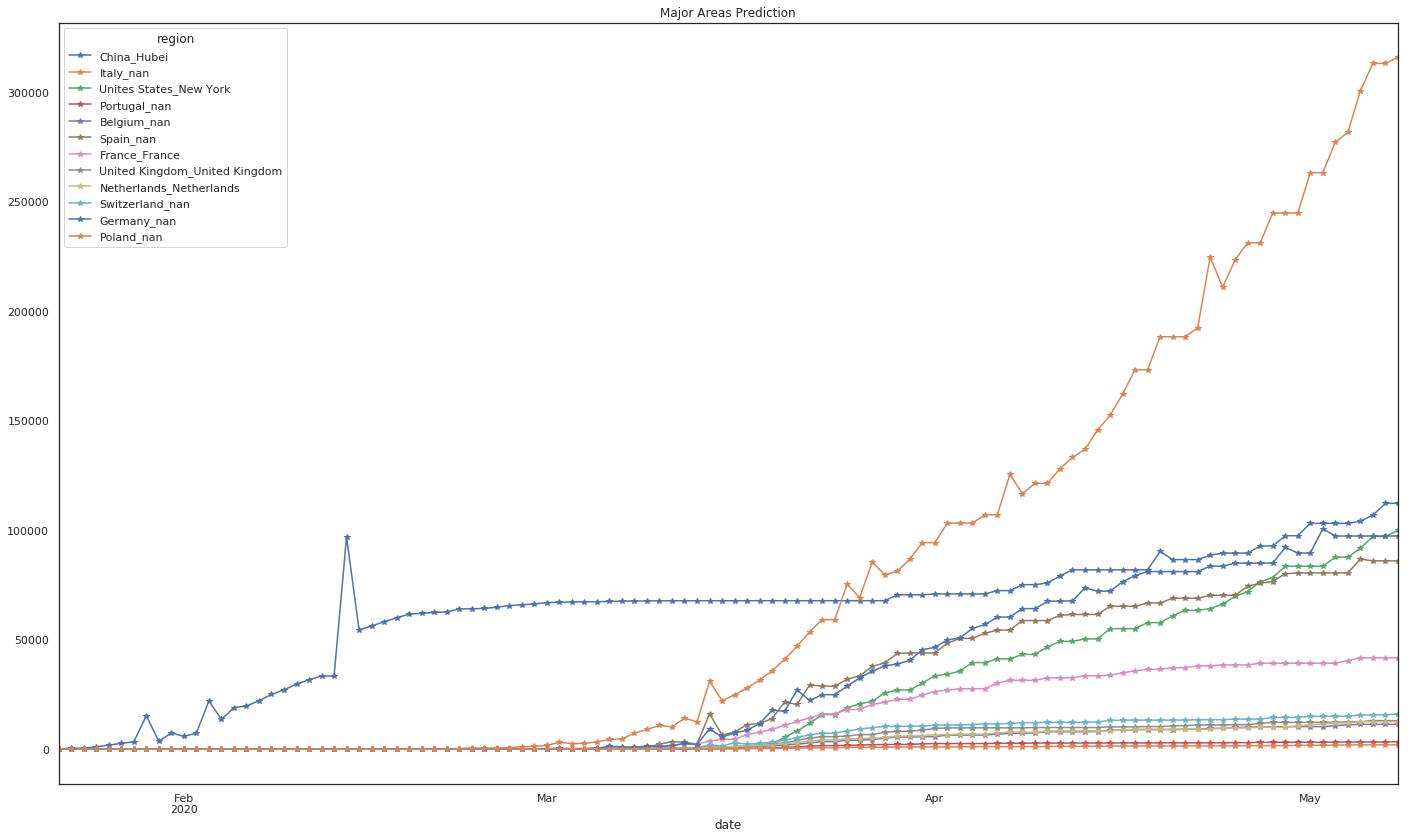

In [42]:
region=[
  #     'China_Anhui', 'China_Beijing',
  #     'China_Chongqing', 'China_Fujian', 'China_Gansu',
  #     'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
  #     'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan','China_Hunan', 
  #     'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
  #     'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
  #     'China_Shandong', 'China_Shanghai', 'China_Shanxi',
  #     'China_Sichuan',  'China_Xinjiang',
  #     'China_Yunnan', 'China_Zhejiang', 
  #      'Hong Kong_Hong Kong','Japan_nan','Others_Diamond Princess cruise ship'
  #  
 ### JOAO - LIST of Countries - Start here
     #'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
        'Unites States_New York',
        'Portugal_nan', 'Belgium_nan',
        'Spain_nan',  'France_France', 
        'United Kingdom_United Kingdom', 'Netherlands_Netherlands', 
        'Switzerland_nan', 'Germany_nan', 'Poland_nan',
  ### JOAO - LIST of Countries - Finish here 
       ]

# region=['China_Anhui', 'China_Beijing',
#        'China_Chongqing', 'China_Fujian', 'China_Gansu',
#        'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
#        'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
#        'China_Jiangsu', 'China_Jiangxi', 'China_Liaoning',
#        'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
#        'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      
#        'China_Yunnan', 'China_Zhejiang' 
#      ]

### Joao - ERROR - KeyError: "None of [Index(['Portugal_nan', 'Andorra_nan', 'Spain_nan', 'Belgium_nan',\n       'Morocco_nan', 'Netherlands_Netherlands', 'France_France', 'Poland_nan',\n       'United Kingdom_United Kingdom', 'Switzerland_nan', 'Germany_nan',\n       'Italy_nan'],\n      dtype='object')] are in the [columns]"     

p=pred[region]
p.plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

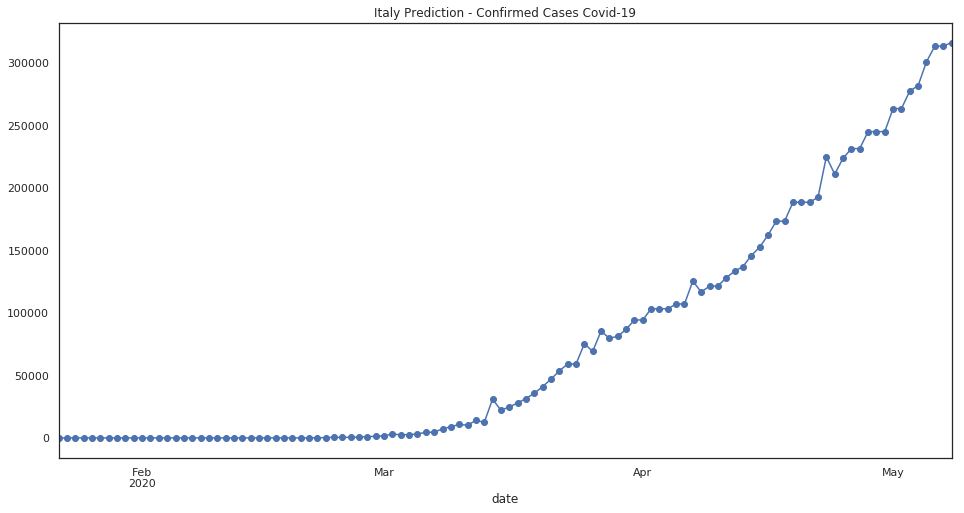

In [43]:
### Joao - Error - KeyError: 'Italy_nan'
p2=pred['Italy_nan']
p2.plot(marker='o',figsize=(16,8),title ='Italy Prediction - Confirmed Cases Covid-19')

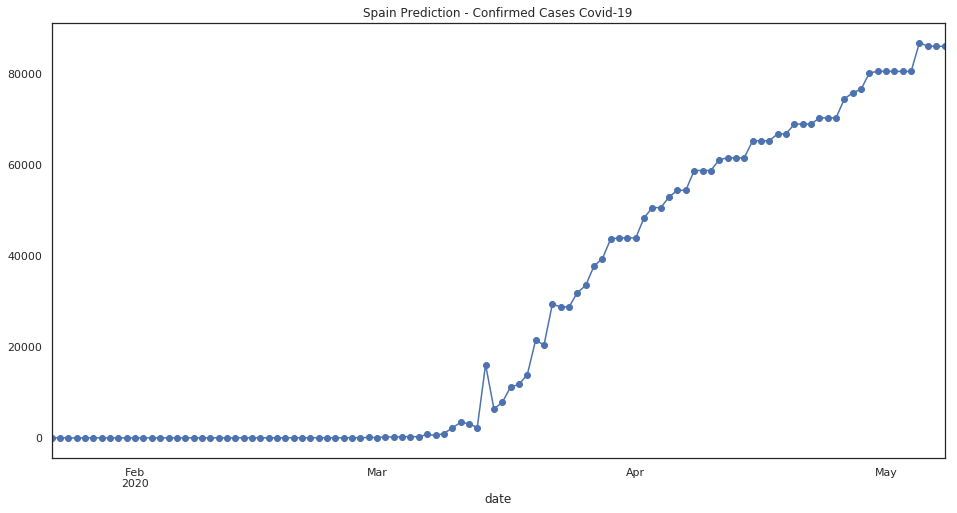

In [44]:
p2=pred['Spain_nan']
p2.plot(marker='o',figsize=(16,8),title ='Spain Prediction - Confirmed Cases Covid-19')

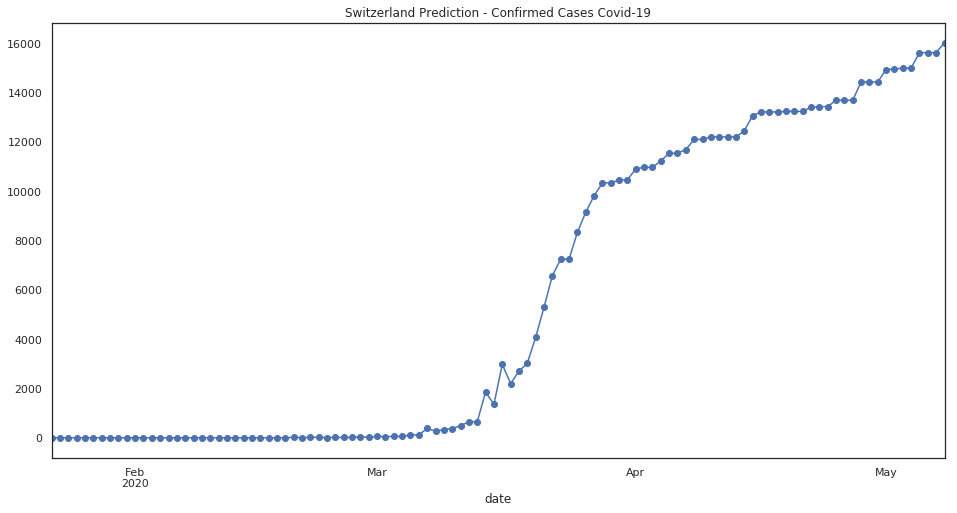

In [45]:
p2=pred['Switzerland_nan']
p2.plot(marker='o',figsize=(16,8),title ='Switzerland Prediction - Confirmed Cases Covid-19')

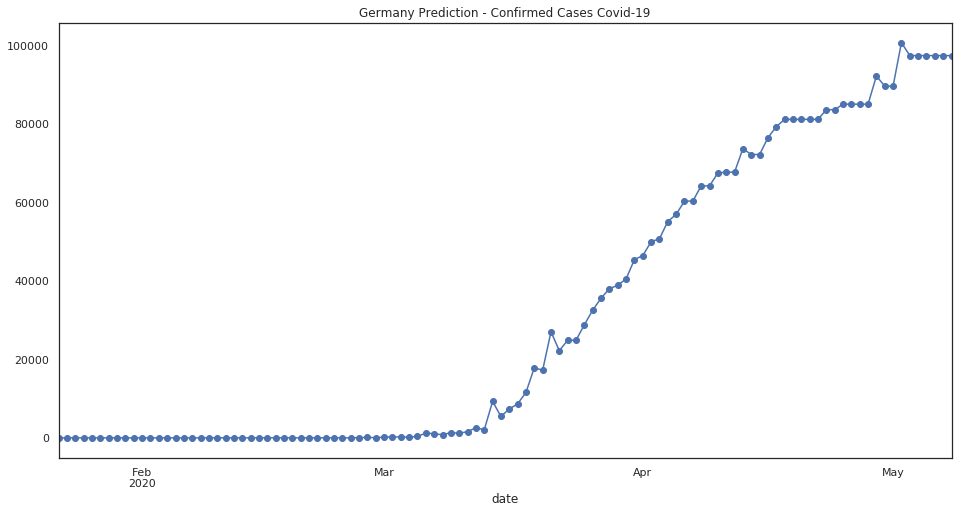

In [46]:
p2=pred['Germany_nan']
p2.plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

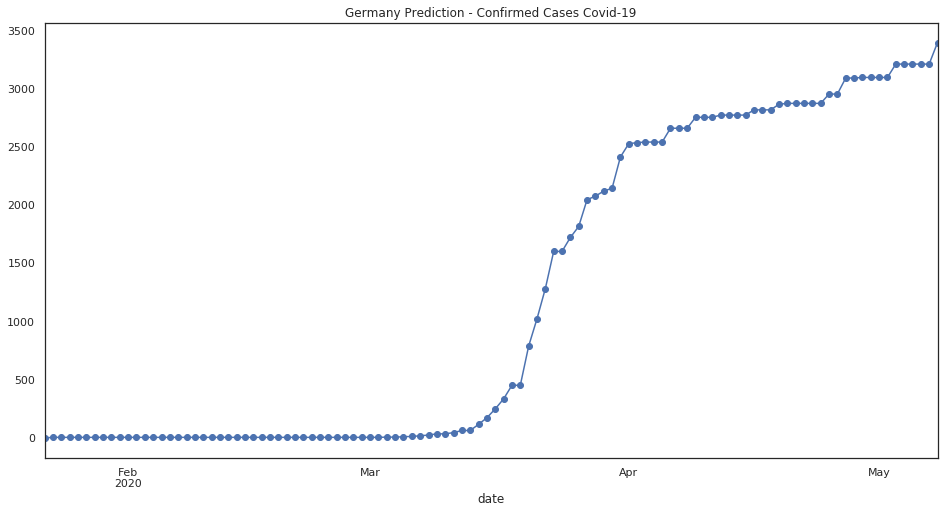

In [47]:
p2=pred['Portugal_nan']
p2.plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

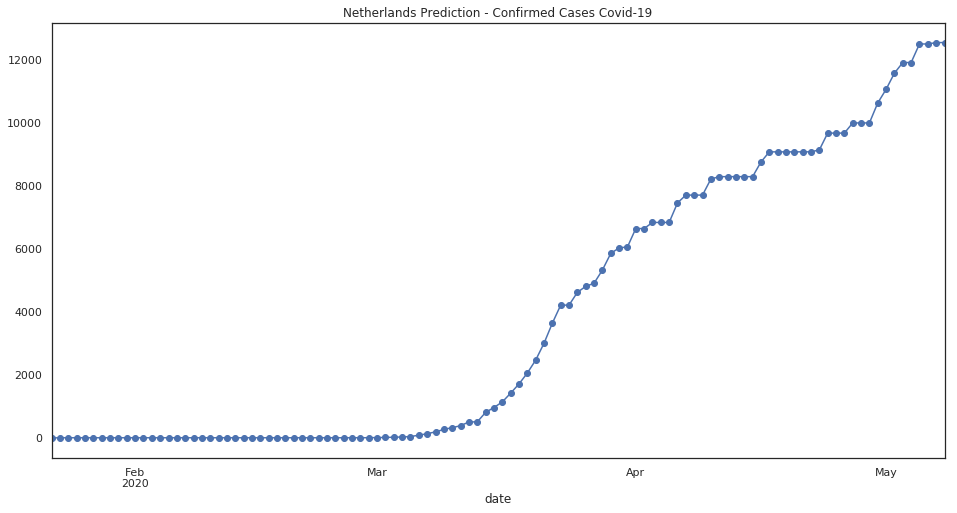

In [48]:
p2=pred['Netherlands_Netherlands']
p2.plot(marker='o',figsize=(16,8),title ='Netherlands Prediction - Confirmed Cases Covid-19')

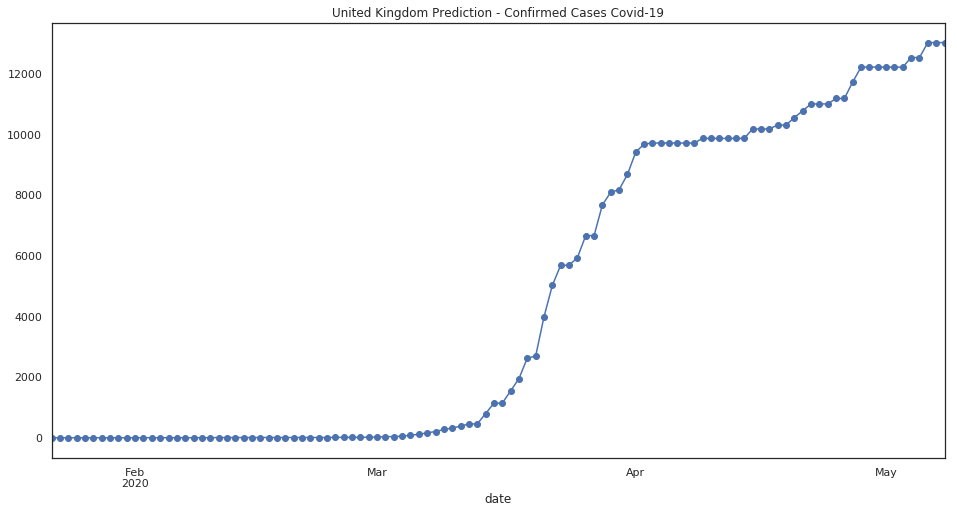

In [49]:
p2=pred['United Kingdom_United Kingdom']
p2.plot(marker='o',figsize=(16,8),title ='United Kingdom Prediction - Confirmed Cases Covid-19')

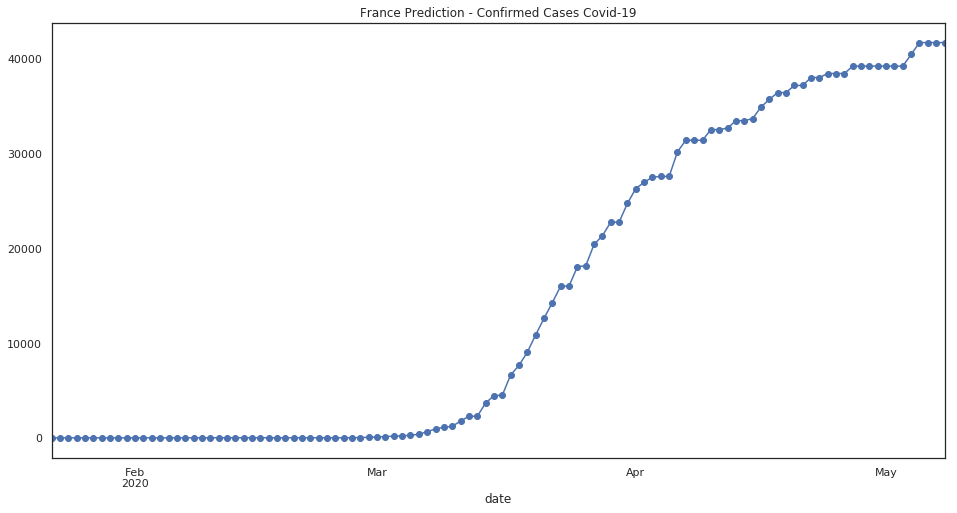

In [50]:
p2=pred['France_France']
p2.plot(marker='o',figsize=(16,8),title ='France Prediction - Confirmed Cases Covid-19')

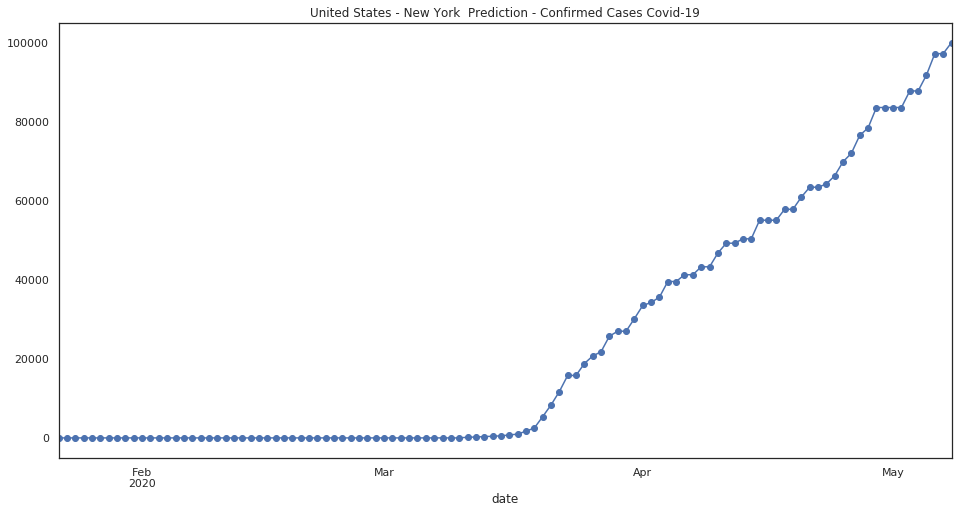

In [51]:
p2=pred['Unites States_New York']
p2.plot(marker='o',figsize=(16,8),title ='United States - New York  Prediction - Confirmed Cases Covid-19')

In [52]:
p=pd.DataFrame(p)


## Prediction Heatmap

In [53]:
pip install gmplot

Note: you may need to restart the kernel to use updated packages.


In [54]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [72]:
heatmap=confirmed[['region','Lat','Long']]
p_m=pred.T
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [73]:
heatmap_m.columns.values[1:111] #9/30/61/107

array(['Lat', 'Long', Timestamp('2020-01-22 00:00:00'),
       Timestamp('2020-01-23 00:00:00'), Timestamp('2020-01-24 00:00:00'),
       Timestamp('2020-01-25 00:00:00'), Timestamp('2020-01-26 00:00:00'),
       Timestamp('2020-01-27 00:00:00'), Timestamp('2020-01-28 00:00:00'),
       Timestamp('2020-01-29 00:00:00'), Timestamp('2020-01-30 00:00:00'),
       Timestamp('2020-01-31 00:00:00'), Timestamp('2020-02-01 00:00:00'),
       Timestamp('2020-02-02 00:00:00'), Timestamp('2020-02-03 00:00:00'),
       Timestamp('2020-02-04 00:00:00'), Timestamp('2020-02-05 00:00:00'),
       Timestamp('2020-02-06 00:00:00'), Timestamp('2020-02-07 00:00:00'),
       Timestamp('2020-02-08 00:00:00'), Timestamp('2020-02-09 00:00:00'),
       Timestamp('2020-02-10 00:00:00'), Timestamp('2020-02-11 00:00:00'),
       Timestamp('2020-02-12 00:00:00'), Timestamp('2020-02-13 00:00:00'),
       Timestamp('2020-02-14 00:00:00'), Timestamp('2020-02-15 00:00:00'),
       Timestamp('2020-02-16 00:00:00'), Tim

In [76]:
### JOAO - Error - IndexError: single positional indexer is out-of-bounds
heatmap=pd.DataFrame()
#for i in range(0,len(heatmap_m)):
#    if heatmap_m.iloc[i,111].astype(int)==0:  # heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
#        continue
        
heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,7].astype(int)), ignore_index=True,sort=False))

In [77]:
latitudes = heatmap['Lat']
longitudes = heatmap['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(30.97564, 112.2707, 5)
gmap.heatmap(latitudes, longitudes)
# Generate the heatmap into an HTML file
gmap.draw("Heatmap4-2020-02-24.html")

In [78]:
exit()

H2O session _sid_a485 closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
